In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data set

In [ ]:
data_train = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_train.csv")

In [102]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
data.shape

(891, 12)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Null values

In [105]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
null_features = [feature for feature in data.columns if data[feature].isnull().sum() >= 1]

In [107]:
null_features

['Age', 'Cabin', 'Embarked']

### Percentage of null values

In [108]:
total_val = data.shape[0]
for feature in null_features:
    null_val = data[feature].isnull().sum()
    
    print(f'Null values in the column {feature} is {round((null_val / total_val) * 100,2)} %')
    print('-' * 60)
    
    

Null values in the column Age is 19.87 %
------------------------------------------------------------
Null values in the column Cabin is 77.1 %
------------------------------------------------------------
Null values in the column Embarked is 0.22 %
------------------------------------------------------------


### Observation
- More than 77% values in Caabin column are null
- It will be best to drop this column rather than handling the null values

In [109]:
data.drop('Cabin', axis= 1, inplace= True)

In [110]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [111]:
null_features.remove('Cabin')

In [112]:
null_features

['Age', 'Embarked']

<Axes: xlabel='Survived', ylabel='count'>

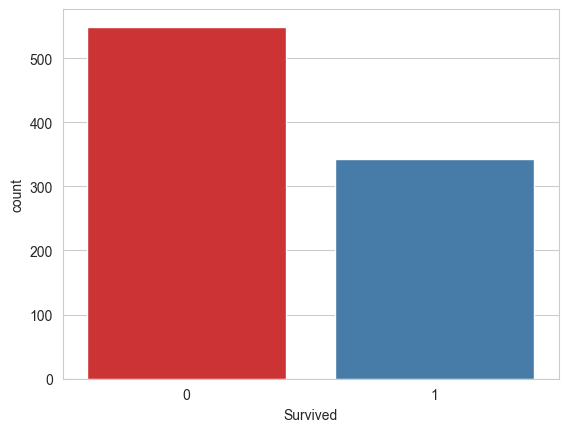

In [113]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='Set1')

<Axes: xlabel='Survived', ylabel='count'>

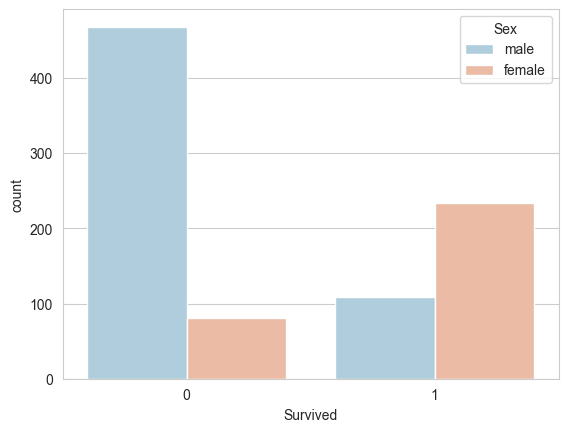

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

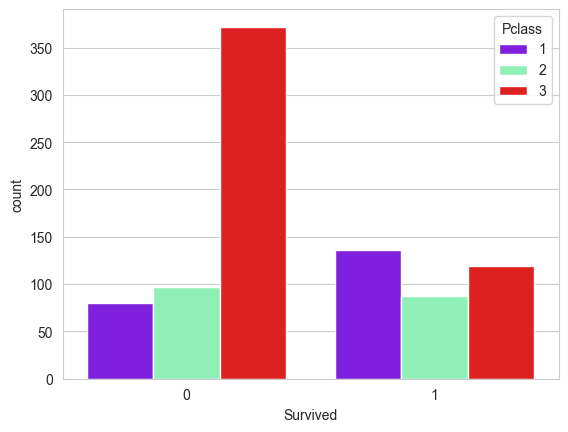

In [115]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

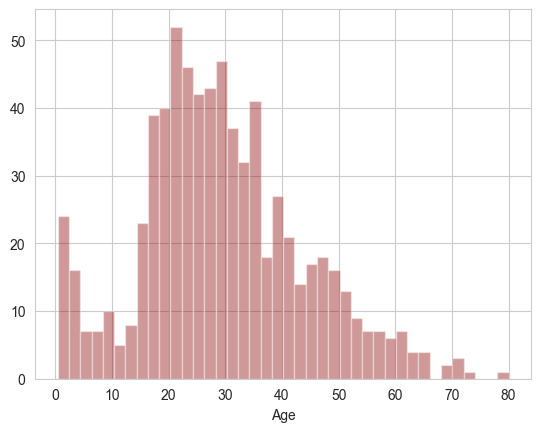

In [116]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)
plt.show()

<Axes: >

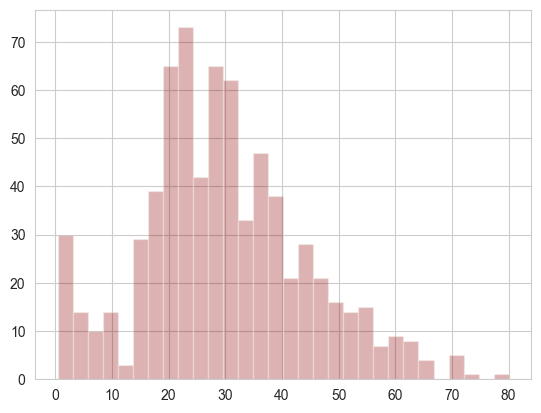

In [117]:
data['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

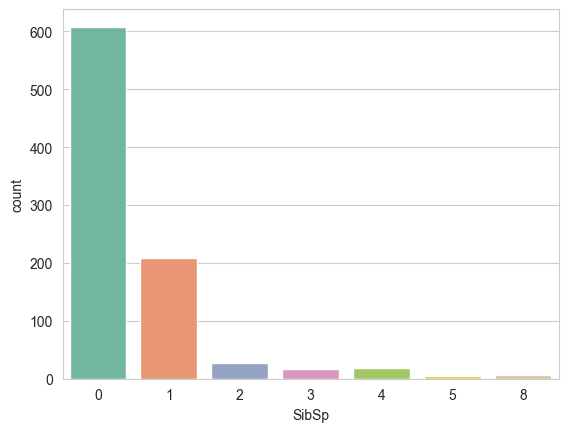

In [118]:
sns.countplot(x='SibSp',data=data,palette='Set2')

<Axes: >

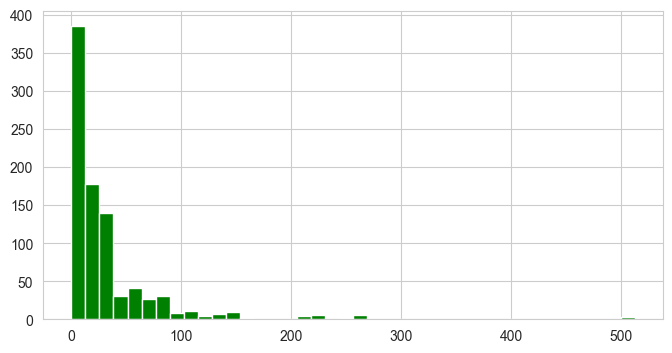

In [119]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Handling the Null values

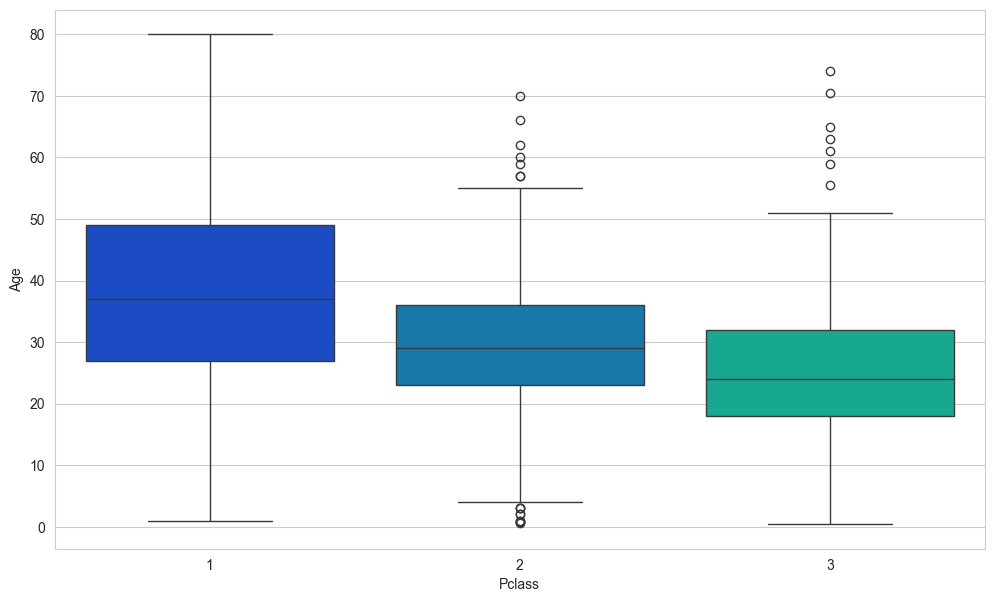

In [120]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')
plt.show()

- We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

- Passengers median age is varying highly with different passenger classes

- So we need to fill the null age values according to passenger classes

### Median Age of passengers of Pclass 1

In [121]:
data[data['Pclass'] == 1]['Age'].median()

np.float64(37.0)

### Median Age of passengers of Pclass 2

In [122]:
data[data['Pclass'] == 2]['Age'].median()

np.float64(29.0)

### Median Age of passengers of Pclass 3

In [123]:
data[data['Pclass'] == 3]['Age'].median()

np.float64(24.0)

- We will replace the null age value of the passenger which have pclass as 1 with 37 , pclass as 2 with 29, pclass as 3 with 24

In [124]:
#Function to impute the age null values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [125]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

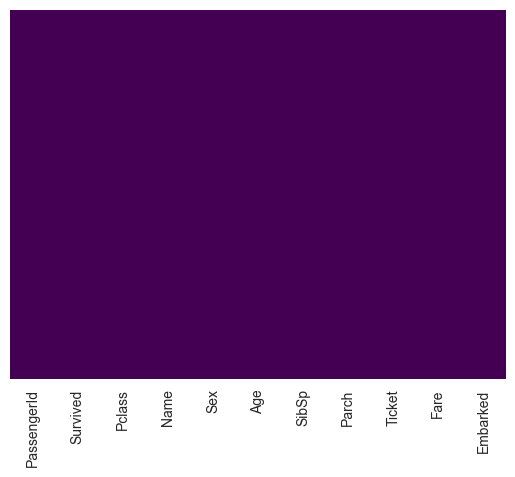

In [126]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Handling the missing values of Embarked column

In [127]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [128]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [129]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [130]:
data['Embarked'].fillna(value=data['Embarked'].mode()[0],inplace=True)

In [131]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Features Name,Ticket,PassengerId won't provide any meaningful information the prediction, so we can drop them

In [134]:
data.drop(['Name','Ticket','PassengerId'], axis= 1, inplace= True)

In [135]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Converting Categorical Features

In [136]:
pd.get_dummies(data['Embarked'],drop_first=True,dtype=int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [137]:
sex = pd.get_dummies(data['Sex'],drop_first=True,dtype=int)
embark = pd.get_dummies(data['Embarked'],drop_first=True,dtype=int)

In [138]:
data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [139]:
data = pd.concat([data,sex,embark],axis=1)

In [140]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Split the dataset into independent and dependent variables

In [141]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [142]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [143]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Spliting the data into training and testing data set

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=34)

## Scaling the Data

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()

In [148]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   #We will just transform the test data to avoid data leakage

## Model Traning

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
model = LogisticRegression()

In [151]:
model.fit(X_train,y_train)

LogisticRegression()

## Model Traning Accuracy

In [153]:
model.score(X_train,y_train)

0.7961476725521669

## Predictions

In [154]:
y_pred = model.predict(X_test)

In [155]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

## Evaluation

In [163]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,roc_auc_score,roc_curve,precision_score
from sklearn.metrics import classification_report

### Confusion matrix

In [158]:
confusion_matrix(y_test,y_pred)

array([[152,  16],
       [ 31,  69]])

### Accuracy Score

In [159]:
accuracy_score(y_test,y_pred)

0.8246268656716418

### Recall score

In [160]:
recall_score(y_test,y_pred)

np.float64(0.69)

### Precision Score

In [161]:
precision_score(y_test,y_pred)

np.float64(0.8117647058823529)

### Roc Auc Score

In [168]:
roc_auc = roc_auc_score(y_test,y_pred)

In [169]:
roc_auc

np.float64(0.7973809523809523)

### Report

In [165]:
report = classification_report(y_test,y_pred)

In [166]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       168
           1       0.81      0.69      0.75       100

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



- Not so bad! We might want to explore other feature engineering and the other titanic_text.csv file, for some suggestions for feature engineering:

- Trying  grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
- Maybe the Cabin letter could be a feature
- Is there any info you can get from the ticket?

### Roc Auc Curve

In [167]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

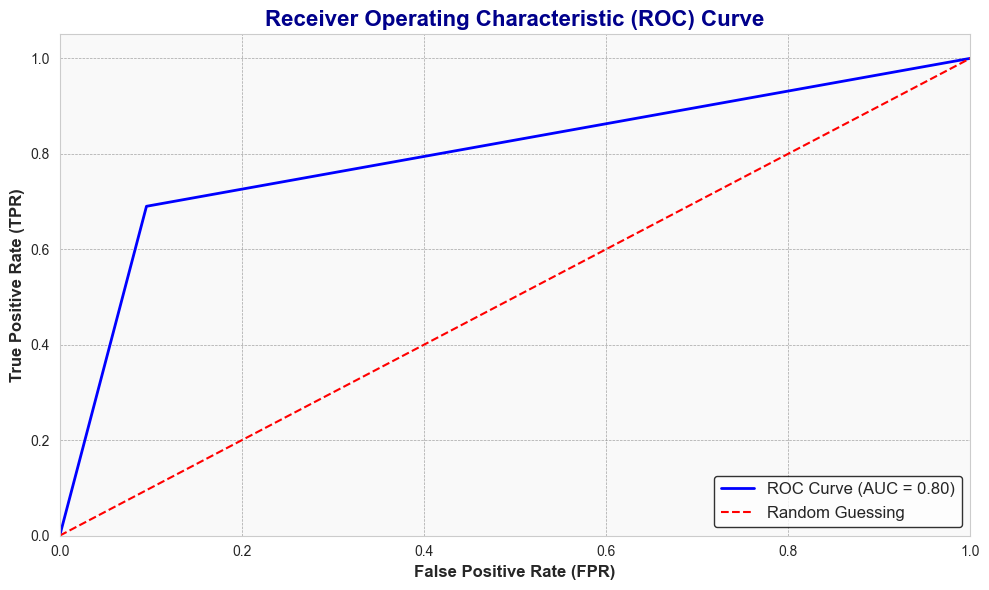

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1.5, label="Random Guessing")

# Add grid and custom style
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

# Labels, title, and legend
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("False Positive Rate (FPR)", fontsize=12, fontweight='bold')
plt.ylabel("True Positive Rate (TPR)", fontsize=12, fontweight='bold')
plt.legend(loc="lower right", fontsize=12, edgecolor='black')

# Additional enhancements
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

## Saving the model as pickel file

In [172]:
import pickle

In [173]:
pickle_out = open('Logistic_model.pkl','wb')
pickle.dump(model,pickle_out)
pickle_out.close()